### **Applying the concept of Handling Numerical Data using Arbitrary Imputation(both by pandas and scikit-learn library)**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [34]:
data = pd.read_csv('/content/titanic_toy.csv')

### **First using Pandas library**

In [35]:
data.sample(5)

,Age,Fare,Family,Survived
33,66.0,10.5000,0,0
495,NaN,14.4583,0,0
884,25.0,7.0500,0,0
869,4.0,11.1333,2,1
429,32.0,NaN,0,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [37]:
data.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [38]:
data.isnull().mean()*100   #Applying imputation on only those cols. having less than 5% missing values

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [40]:
X = data.drop(columns='Survived')
y = data['Survived']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [43]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

#### **Filling the imputation replacing the missing values**

In [44]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [45]:
X_train.sample(10)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
642,2.0,27.9000,5,2.0,2.0,27.9000,27.9000
483,63.0,9.5875,0,63.0,63.0,9.5875,9.5875
384,NaN,7.8958,0,99.0,-1.0,7.8958,7.8958
378,20.0,NaN,0,20.0,20.0,999.0000,-1.0000
228,18.0,13.0000,0,18.0,18.0,13.0000,13.0000
815,NaN,0.0000,0,99.0,-1.0,0.0000,0.0000
401,26.0,8.0500,0,26.0,26.0,8.0500,8.0500
631,51.0,7.0542,0,51.0,51.0,7.0542,7.0542
617,26.0,16.1000,1,26.0,26.0,16.1000,16.1000
811,39.0,24.1500,0,39.0,39.0,24.1500,24.1500


In [46]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477435
Age Variance after 99 wala imputation:  932.9665366701432
Age Variance after -1 wala imputation:  315.9955036260055
Original Fare variable variance:  2761.0314349486343
Fare Variance after 999 wala imputation:  47525.470595360035
Fare Variance after -1 wala imputation:  2675.2394049177024


#### **Plotting the Graphs**

##### **1. For Age Col.**

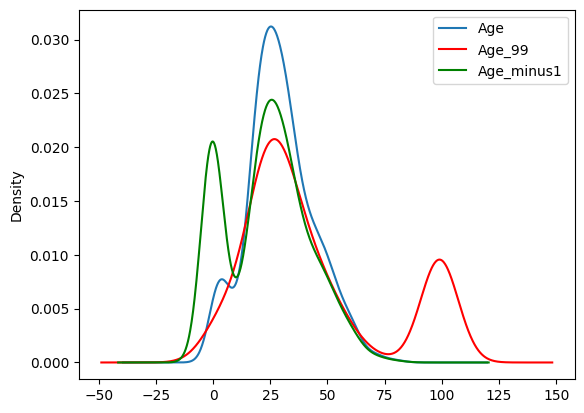

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### **2. For Fare Col.**

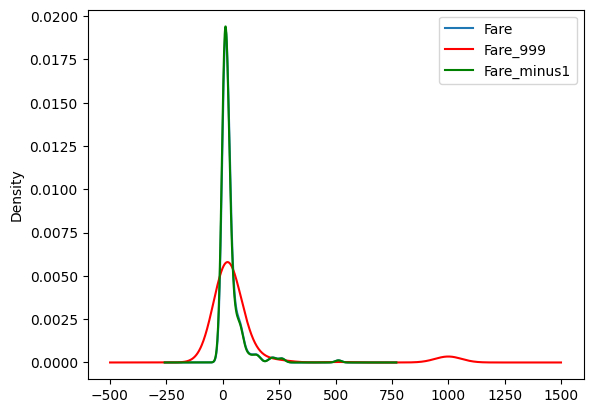

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [49]:
X_train.cov() #Comparing Covariance

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [50]:
X_train.corr() #Correlation

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


#### **Using Scikit Learn Library**

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99) #Applying SimpleImputer Func.
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [62]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [63]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [64]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [65]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [66]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [67]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [70]:
pd.DataFrame(X_train)

,0,1,2
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0
...,...,...,...
707,30.0,8.6625,0.0
708,99.0,8.7125,0.0
709,71.0,49.5042,0.0
710,99.0,221.7792,0.0
